In [1]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

import math

plt.style.use('ggplot')    # стиль графиков
%matplotlib inline

In [2]:
df = pd.read_excel(r"C:\Users\Пользователь\Downloads\Telegram Desktop\data_matstat_K5.xls", sheet_name="B - bodyfat")

In [3]:
n = len(df.B10)
sample = df.B10.to_numpy()

k = round(1 + math.log2(n))   #число интервалов
h = (max(sample) - min(sample)) / k   #ширина
print(k, h)

9 6.322222222222221


[0.011904761904761904,
 0.10714285714285714,
 0.27380952380952384,
 0.31746031746031744,
 0.16666666666666666,
 0.07539682539682539,
 0.03968253968253968,
 0.003968253968253968,
 0.003968253968253968]

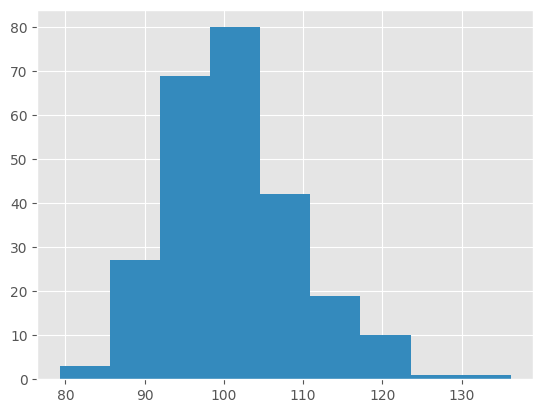

In [4]:
frequencies = plt.hist(sample, bins=k)[0]

frequencies_relative = []
for frequence in frequencies:
  frequencies_relative.append(frequence / n)

values = plt.hist(sample, bins=k)[1]

frequencies_relative

In [5]:
#Вероятность попадания в интервал при условии истинности основной гипотезы

mean = np.mean(sample)
std = np.std(sample)

count,division = np.histogram(sample, bins=k)

p_H_true = []
for i in range(1, len(division)):
  p = stats.norm(loc=mean, scale=std).cdf(division[i]) - stats.norm(loc=mean, scale=std).cdf(division[i-1])
  p_H_true.append(p)

p_H_true

[0.03013581540822357,
 0.11022743511198418,
 0.23495090198723367,
 0.2921485436605218,
 0.21198611034078407,
 0.08971935231369754,
 0.022122083008845328,
 0.0031722578914854527,
 0.000263996591354565]

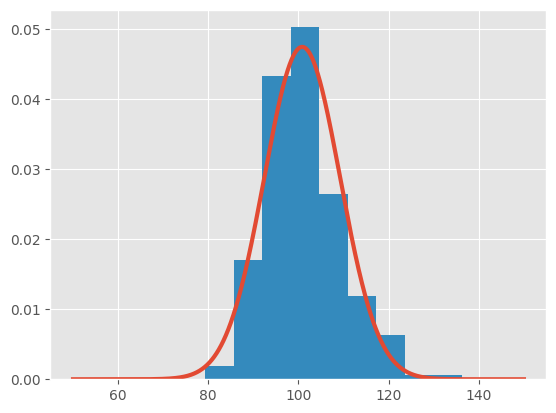

In [7]:
#Построить гистограмму относительных частот и функцию плотности

x = np.linspace(50, 150, 10000)
norm_rv = stats.norm(loc=mean, scale=std)
pdf = norm_rv.pdf(x)

# плотность 
plt.plot(x, pdf, lw=3)

plt.hist(sample, bins=k, density=True);

#plt.ylabel('$f(z|H0)$')
#plt.xlabel('$z$');

In [8]:
arr = []
for i in range(0,k):
  arr.append(n*p_H_true[i])
arr

[7.594225482872339,
 27.777313648220016,
 59.20762730078289,
 73.6214330024515,
 53.42049980587758,
 22.60927678305178,
 5.574764918229023,
 0.7994089886543341,
 0.06652714102135038]

In [9]:
z = 0
for i in range(0,k):
  z += ((frequencies[i] - n*p_H_true[i])**2) / (n*p_H_true[i])

r = 2

f_z_chi = stats.chi2(k - r - 1).cdf(z)
p_value = 2 * min(f_z_chi, 1 - f_z_chi)

quantil = stats.chi2(k - r - 1).ppf(1-0.01)

print("chi-squared criteria for N: z = %.3f; p-value = %.3f" % (z, p_value))
print(quantil)

chi-squared criteria for N: z = 24.652; p-value = 0.001
16.811893829770927


In [10]:
def getNP(val, freq, n1, m, sigma):
  n  = list()
  np = list()
  npx = 0
  nx = 0
  distr = stats.norm(loc = m, scale = sigma)
  for i in range(0, len(val) - 1):
    npx += (distr.cdf(val[i + 1]) - distr.cdf(val[i])) * n1
    nx += freq[i]
    if (npx >= 5):
      n.append(nx)
      np.append(npx)
      nx = 0
      npx = 0
    elif (npx < 5) and (i == len(val) - 2):
      n[len(n) - 1] = nx + n[len(n) - 1]
      np[len(np) - 1] = npx + np[len(np) - 1]    
  return (n, np)

def getZ(n, np):
    z = 0
    for i in range(0, len(n)):
        z += (n[i] - np[i])**2 / np[i]
    return z

def getNP_no_merge(val, freq, n1, m, sigma):
  n  = list()
  np = list()
  npx = 0
  nx = 0
  distr = stats.norm(loc = m, scale = sigma)
  for i in range(0, len(val) - 1):
    npx = (distr.cdf(val[i + 1]) - distr.cdf(val[i])) * n1
    nx = freq[i]
    n.append(nx)
    np.append(npx)
     
  return (n, np)

In [11]:
alpha = 0.01

new_n, new_np = getNP(values, frequencies, n, mean, std)



z = getZ(new_n, new_np)
k = len(new_n)
r = 2

f_z_chi = stats.chi2.cdf(z, k - r - 1)
p_value = 2 * min(f_z_chi, 1 - f_z_chi)

print("chi-squared criteria for N: z = %.3f; p-value = %.3f" % (z, p_value))
# у меня вышел ноль, я хз
# ошибка 2 рода для всех строк

chi-squared criteria for N: z = 12.790; p-value = 0.025


In [18]:
stats.jarque_bera(sample)

SignificanceResult(statistic=28.636453835739097, pvalue=6.048853397994733e-07)

In [15]:
freq,division = np.histogram(sample, bins=k)
for i in range(len(freq)):
    print(freq[i], round(freq[i]/len(sample), 3))

5 0.02
65 0.258
98 0.389
58 0.23
23 0.091
1 0.004
2 0.008


In [17]:
hist, bin_edges = np.histogram(sample, bins=k)
bin_edges

array([ 79.3       ,  87.42857143,  95.55714286, 103.68571429,
       111.81428571, 119.94285714, 128.07142857, 136.2       ])